## Load Dataset

In [9]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Preprocess Data

label    0
text     0
dtype: int64


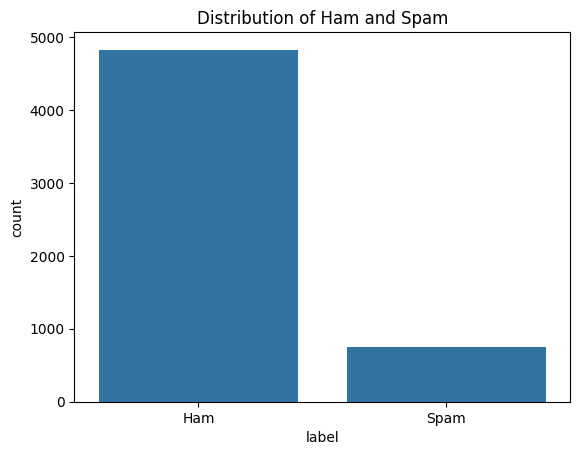

,proportion
label,
0,0.865937
1,0.134063


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df['label'] = df['label'].map({'ham': 0, 'spam': 1}) #converting to binary
print(df.isnull().sum())

#visualization
sns.countplot(data=df, x='label')
plt.title('Distribution of Ham and Spam')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

#label distribution for binary
df['label'].value_counts(normalize=True)

## Vectorize Text

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']

##Train Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

## Evaluate Model

Accuracy: 0.9686
Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



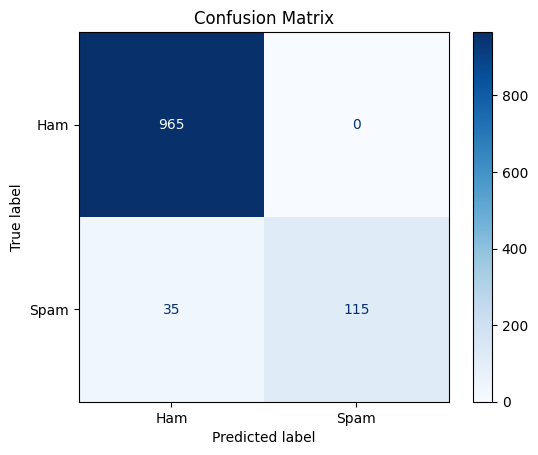

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

y_pred = model.predict(X_test) #model prediction

accuracy = accuracy_score(y_test, y_pred) #accuracy calculation
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred) #visualization of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Prediction using Model

In [15]:
email = [input("Enter your email/message to classify: ")]
email_vector = vectorizer.transform(email)
prediction = model.predict(email_vector)[0]
result = "Spam" if prediction == 1 else "Ham (Not Spam)"
print("Prediction:", result)


Enter your email/message to classify: Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.
Prediction: Spam
